# Hyperparameter Tuning

For each of previously selected models we will perform hyperparameter tuning using the Bayesian Optimization method.

We have created HyperparameterTuner classes for each model, which will be used to perform the hyperparameter tuning.

## Load data

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from src.features.helpers.load_data import load_data
from src.models.model_2.model.pipelines import pipeline
import pandas as pd

train_data, augmented_data, test_data = load_data('1_00h')

all_train_data_transformed = pipeline.fit_transform(pd.concat([train_data, augmented_data]))

X_train = all_train_data_transformed.iloc[:len(train_data)].drop(columns=['bg+1:00'])
y_train = all_train_data_transformed.iloc[:len(train_data)]['bg+1:00']

X_augmented = all_train_data_transformed.iloc[len(train_data):].drop(columns=['bg+1:00'])
y_augmented = all_train_data_transformed.iloc[len(train_data):]['bg+1:00']

X_augmented_train, X_augmented_val, y_augmented_train, y_augmented_val = train_test_split(X_augmented, y_augmented, test_size=0.2)

X_train = pd.concat([X_train, X_augmented_train])
y_train = pd.concat([y_train, y_augmented_train])


### HistGradientBoostingRegressor Hyperparameter Tuning

Train Set
RMSE: 1.7124749476313792
R2 Score: 0.6940450421868392


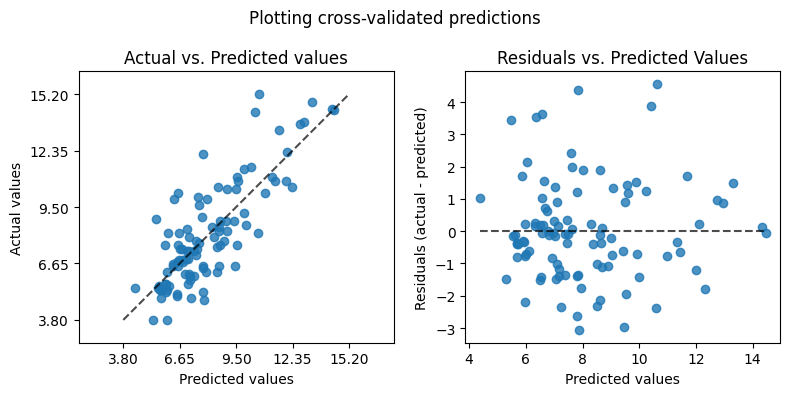

Test Set
RMSE: 1.7462534441493816
R2 Score: 0.7021466144071595


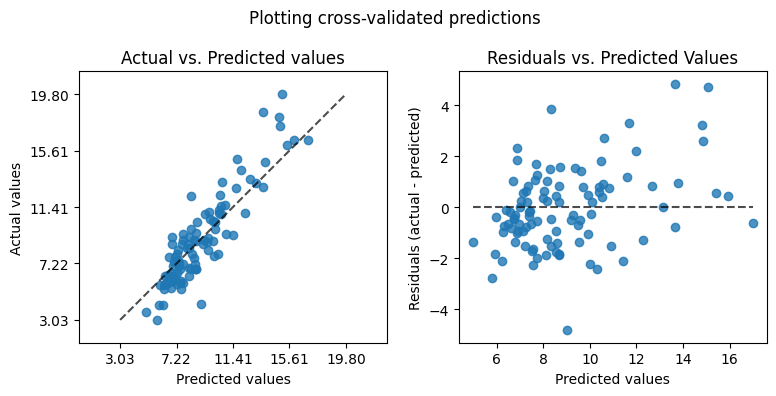

Best Parameters for HistGradientBoostingRegressor


OrderedDict([('early_stopping', True),
             ('l2_regularization', 1.0),
             ('learning_rate', 0.049999999999999996),
             ('max_bins', 200),
             ('max_depth', 10),
             ('max_iter', 1000),
             ('max_leaf_nodes', 50),
             ('min_samples_leaf', 10),
             ('n_iter_no_change', 10),
             ('scoring', 'neg_mean_absolute_error')])

In [3]:
from src.features.tuners import HistGradientBoostingHyperparameterTuner

tuner = HistGradientBoostingHyperparameterTuner(search_space='custom')
tuner.fit(X_train, y_train, X_augmented_val, y_augmented_val)
tuner.show_chart()
tuner.get_params()

### KNeighborsRegressor Hyperparameter Tuning


In [ ]:
from src.features.tuners import KNeighborsHyperparameterTuner

tuner = KNeighborsHyperparameterTuner(search_space='custom')
tuner.fit(X_train, y_train, X_augmented_val, y_augmented_val)
tuner.show_chart()
tuner.get_params()

### LassoLarsICRegressor Hyperparameter Tuning

In [ ]:
from src.features.tuners import LassoLarsICHyperparameterTuner

tuner = LassoLarsICHyperparameterTuner(search_space='custom')
tuner.fit(X_train, y_train, X_augmented_val, y_augmented_val)
tuner.show_chart()
tuner.get_params()

### XGBRegressor Hyperparameter Tuning

In [ ]:
from src.features.tuners import XGBHyperparameterTuner

tuner = XGBHyperparameterTuner(search_space='custom')
tuner.fit(X_train, y_train, X_augmented_val, y_augmented_val)
tuner.show_chart()
tuner.get_params()
